## Librerias 

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Creación de perceptrón desde 0

In [ ]:
X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])

Y = np.array([[0,0,1,1]]).T

In [192]:
def perceptron(X,Y,iteraciones):
    pesos_sinapticos = 2* np.random.random((3,1)) -1 
    
    sigmoide = (lambda x: 1/ (1+ np.e ** (-x)))
    sigmoide_derivada = (lambda x: x*(1-x))
    entrada = X
    salida_esperada = Y
    
    for i in range(iteraciones):
        salida = sigmoide(np.dot(entrada,pesos_sinapticos)) 
        
        error = salida_esperada - salida 
    
        ajustes = error * sigmoide_derivada(salida)
    
        pesos_sinapticos += np.dot(entrada.T, ajustes)
    return salida 

perceptron(X,Y, iteraciones = 20000)

array([[0.00679829],
       [0.0055366 ],
       [0.99548491],
       [0.99445471]])

> Voy a explicar paso por paso como se ha escrito el código del perceptrón:

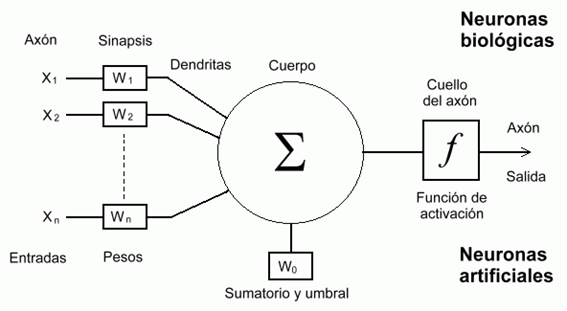

> Como se puede apreciar un perceptrón consta de varios elementos: 

- Por una parte tenemos las entradas y las salidas, las entradas serán las variables para entrenar el modelo y la salida la predicción arrojada por el modelo con dichas entradas

- Cada entrada será multiplicada por un peso y sumada al umbral de activación de la neurona (W0) 

- Una vez hechos los pasos anteriores, el producto resultante será corregido por una función de activación 
que permitirá ajustar la salida a un rango deseado (Como puede ser entre {-1,1} o {0-1}

Ahora bien, ¿Cómo se ajustan los pesos para que al multiplicarlos por las entradas den la salida deseada? Aquí la gracia del perceptrón, vamos por partes:

- Definición de los valores de entrada y la salida deseada:`

In [194]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1]])

Y = np.array([[0,0,1,1]]).T

Vamos a pasar 3 variables de entrada a la neurona y una variable esperada de salida (Y). Si se observa detenidamente el objetivo es que el perceptrón aprenda a arrojar una salida de 1 solo cuando hay un valor de 1 en la primera variable. 

- Definición de los pesos 

Los pesos se van a generar aleatoriamente en cada iteración en un rango: 

``` pesos_sinapticos = 2* np.random.random((3,1)) -1 ```

El rango va desde 3 a 1 y es corregido siempre con un umbral de activación de -1

- Definición de función de activación:

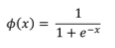

La función de activación sigmoide permite estandarizar la salida en un rango entre 0 y 1 como una probabilidad


```sigmoide = (lambda x: 1/ (1+ np.e ** (-x)))```

También se necesitará la derivada de la función (luego explicaré por qué)

```sigmoide_derivada = (lambda x: x*(1-x))```

- Calcular la salida a partir de la entrada:

```salida = sigmoide(np.dot(entrada,pesos_sinapticos))```

```np.dot``` Simplemente calcula  el producto de dos matrices, es decir, realiza este cálculo: 

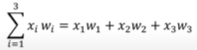

Se multiplica cada valor de entrada por cada peso 


- Definir el error:

El error simplemente será la diferencia entre el valor real y el valor devuelto por el perceptrón:

``` error = salida_esperada - salida  ```

- Definir el ajuste de pesos: 

``` ajustes = error * sigmoide_derivada(salida) ```

Para ajustar los pesos se multiplica el error por la derivada de la función sigmoide aplicada a la salida, ¿Por qué? 

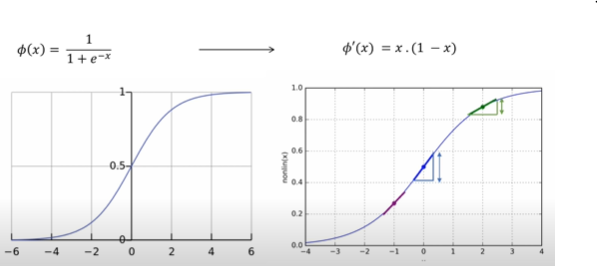

Al deriviar la función sigmoide,  se obtiene ```sigmoide_derivada = (lambda x: x*(1-x))```
donde se aprecia que, caunto mayor es el valor de X, menor será la salida, y cuanto menor es el resultado, mayor será 

```sigmoide_derivada(0,75) = 0.1875 ```

```sigmoide_derivada (0,5) = 0.25 ```

Esto permite  lo siguiente, por ejemplo: 

Caso 1: La salida esperada es 1 y se tiene una salida anterior de 0.8 y un error de 0.2 :  

``` error(0.2) * sigmoide_derivada (0.8) = 0.0319 ``` 

El nuevo peso deberá ser corregido: peso anterior * 0.0319 

Caso 2: La salida esperada es 1 y se tiene una salida anterior de 0.2 y un error de 0.8: 

``` error(0.8) * sigmoide_derivada (0.2) = 0.128``` 

El nuevo peso deberá ser corregido por 0.128, para acercarse a 1 se multplica por un numero mucho mayor puesto que necesta mayor corrección. 

En resumen, al calcular la derivada de la función sigmoidea, los numeros altos devolverán un menor numero y vicebersa, por lo que al multiplicarlo por el error dará una corrección mayor.

Así una vez corregidos los pesos éstos se actualizan

``` pesos_sinapticos += np.dot(entrada.T, ajustes) ```

Solo queda definir el numero de iteraciones para ajustar los pesos  que deberá ser bastante alto (y razón por la cual no se usaban las redes neuronales hasta recientemente devido a la capacidad computacional) 